In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/heart-disease-uci/heart.csv


In [2]:
df_heartdisease = pd.read_csv("/kaggle/input/heart-disease-uci/heart.csv")

In [3]:
df_heartdisease.shape

(303, 14)

In [4]:
df_heartdisease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df_heartdisease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df_heartdisease.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
df_heartdisease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df_heartdisease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [9]:
num_features = ['age','trestbps','chol','thalach','oldpeak']
cat_features = ['sex','cp','fbs','restecg','exang','slope','ca','thal','target']

<Figure size 1800x1440 with 0 Axes>

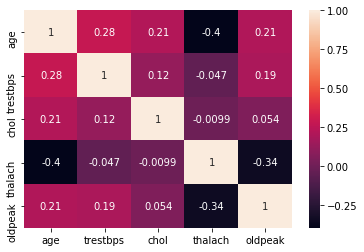

<Figure size 1800x1440 with 0 Axes>

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.heatmap(df_heartdisease[num_features].corr(method='pearson'),annot=True)
plt.figure(figsize=(25,20))

#### Analysis of Categorical Features with Respect to target coulmn

In [11]:
def cat_univariate_eda(df, cat_col_names, n_cols = 3, figsize = None, save_fig = False):
    
    # univariate eda for categorical features
    n_rows = len(cat_col_names)/n_cols
    
    plt.figure(figsize=(5*n_cols,5*n_rows))
    
    if figsize:
        plt.figure(figsize=figsize)
    
    for i in range(0,len(cat_col_names)):
        plt.subplot(n_rows+1, n_cols, (i+1))
        sns.countplot(df[cat_col_names[i]],hue=df['target'])
    
    if save_fig:
        plt.savefig('./cat_col_eda1.png')
    
    plt.show()

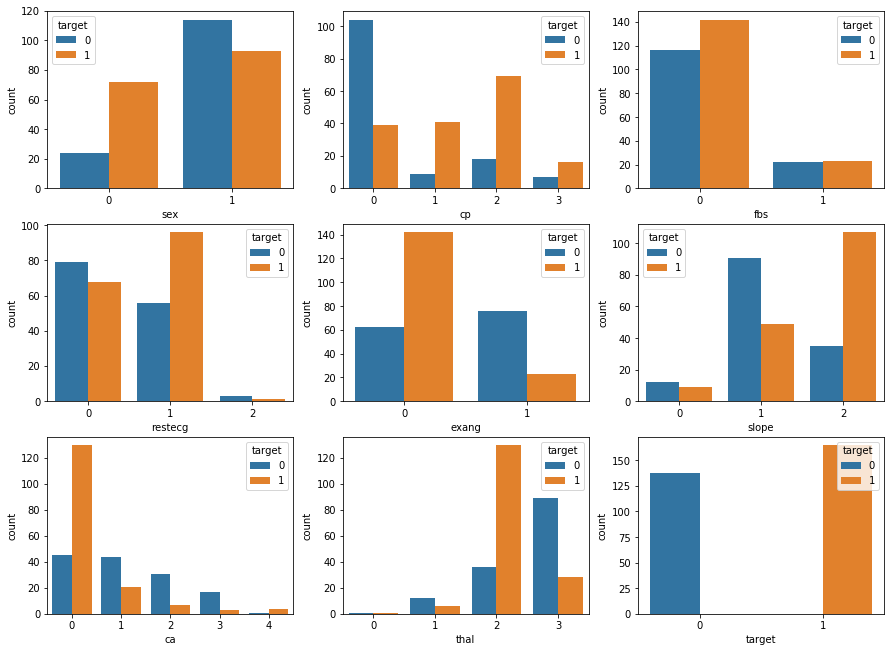

In [12]:
cat_univariate_eda(df_heartdisease,cat_features, save_fig = False)

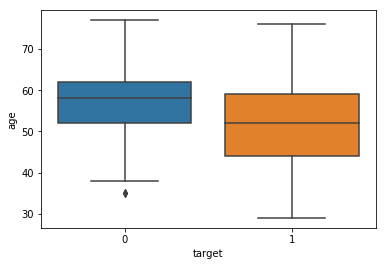

In [13]:
sns.boxplot(df_heartdisease['target'],df_heartdisease['age'])

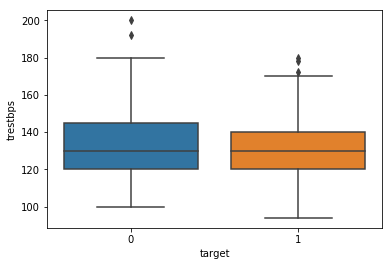

In [14]:
sns.boxplot(df_heartdisease['target'],df_heartdisease['trestbps'])

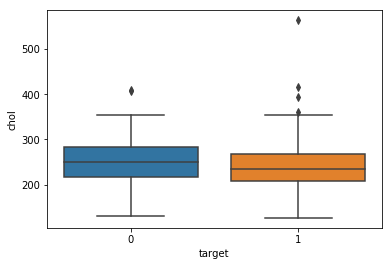

In [15]:
sns.boxplot(df_heartdisease['target'],df_heartdisease['chol'])

In [16]:
from sklearn.model_selection import train_test_split
X=pd.DataFrame(df_heartdisease[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']])
y=pd.DataFrame(df_heartdisease['target'])
print(X.shape)
print(y.shape)

(303, 13)
(303, 1)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242, 1)
(61, 1)


In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.sort_values(by='Score')) 

       Specs       Score
5        fbs    0.202934
6    restecg    2.978271
12      thal    5.791853
1        sex    7.576835
10     slope    9.804095
3   trestbps   14.823925
0        age   23.286624
4       chol   23.936394
8      exang   38.914377
2         cp   62.598098
11        ca   66.440765
9    oldpeak   72.644253
7    thalach  188.320472


#### Model Builiding with all features

In [19]:
from sklearn.linear_model import LogisticRegression
lmmodel = LogisticRegression()
lmmodel.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
print(lmmodel.score(X_train,y_train))
print(lmmodel.score(X_test,y_test))

0.8512396694214877
0.8852459016393442


In [21]:
lm_predictions = lmmodel.predict(X_test)
print(lm_predictions)

[1 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1
 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1]


In [22]:
from sklearn.metrics import confusion_matrix,r2_score,roc_auc_score,roc_curve
confusion_matrix(lm_predictions,y_test)

array([[22,  2],
       [ 5, 32]])

In [23]:
roc_auc = roc_auc_score(y_test,lm_predictions)
print(roc_auc)

0.8779956427015251


In [24]:
def plot_curve(model, X_test, y_test,score, model_label):
    
    # function to plot roc curve for the given model
    y_score = pd.DataFrame(model.predict_proba(X_test))[1]
    fpr,tpr, threshold = roc_curve(y_test, y_score)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', label='{} {}'.format(model_label,np.round(score,2)))
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")

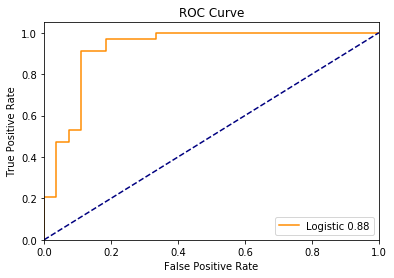

In [25]:
plot_curve(lmmodel, X_test, y_test,roc_auc, 'Logistic')

#### Model Building with Top 10 Features

In [26]:
lmmodel_featureselect = LogisticRegression()
X_train_featureselect = X_train[['thalach','oldpeak','ca','cp','exang','chol','age','trestbps','slope','sex']]
X_test_featureselect = X_test[['thalach','oldpeak','ca','cp','exang','chol','age','trestbps','slope','sex']]
lmmodel_featureselect.fit(X_train_featureselect,y_train)
print(lmmodel_featureselect.score(X_train_featureselect,y_train))
print(lmmodel_featureselect.score(X_test_featureselect,y_test))

0.8471074380165289
0.8360655737704918


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
lmfeatures_predictions = lmmodel_featureselect.predict(X_test_featureselect)
roc_auc_features = roc_auc_score(y_test,lmfeatures_predictions)
print(roc_auc_features)

0.841503267973856


#### As observed there is no significant change in AUC score with Top 10 Features

In [28]:
from sklearn.tree import DecisionTreeClassifier
clf_params = DecisionTreeClassifier(random_state=3)
clf_params.fit(X_train,y_train)
print(clf_params.score(X_train,y_train))
print(clf_params.score(X_test,y_test))

1.0
0.7377049180327869


In [29]:
# Optimizing the Decision tree to reduce overfitting problem

clf = DecisionTreeClassifier(max_depth=3,min_samples_split=10,random_state=3)
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.8264462809917356
0.9016393442622951


In [30]:
#Finding the best hyper parameters with GridSearchCV 
from sklearn.model_selection import GridSearchCV
parameters={'min_samples_split' : np.arange(10,20),'max_depth': np.arange(3,8),'max_features': np.arange(6,12)}
clf_tree=DecisionTreeClassifier(random_state=2)
clf=GridSearchCV(clf_tree,parameters,cv=10, scoring='accuracy')
clf.fit(X,y)
print(clf.best_score_)
print(clf.best_params_)
print(clf.best_estimator_)

0.8151815181518152
{'max_depth': 3, 'max_features': 7, 'min_samples_split': 10}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=2, splitter='best')


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [31]:
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.8347107438016529
0.8852459016393442


In [32]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=3)
xgb.fit(X_train,y_train)
print(xgb.score(X_train,y_train))
print(xgb.score(X_test,y_test))

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9834710743801653
0.819672131147541


In [33]:
# As above model is overfitting the data so using GridSearchCV
parameters_xgb={'eta' : [0.001, 0.01, 0.1],'min_child_weight': np.arange(3,8,2),'subsample':[0.5,0.6,0.7,0.8] ,'max_depth': np.arange(2, 8),'colsample_bytree': [0.5,0.6,0.7,0.8,0.9]}
xgb_tree=XGBClassifier(seed=5,n_jobs=-1,n_estimators=500)
xgb_params=GridSearchCV(xgb_tree,parameters_xgb,cv=10, scoring='accuracy')
xgb_params.fit(X,y)
print(xgb_params.best_score_)
print(xgb_params.best_params_)
print(xgb_params.best_estimator_)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8382838283828383
{'colsample_bytree': 0.5, 'eta': 0.001, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.6}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eta=0.001, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=500, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=5,
              silent=None, subsample=0.6, verbosity=1)


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [34]:
print(xgb_params.score(X_train,y_train))
print(xgb_params.score(X_test,y_test))

0.9214876033057852
0.9508196721311475


In [35]:
predict_XGB = xgb_params.predict(X_test)
confusion_matrix(predict_XGB,y_test)

array([[25,  1],
       [ 2, 33]])

In [36]:
roc_auc_XGB = roc_auc_score(y_test,predict_XGB)
print(roc_auc_XGB)

0.9482570806100218


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was

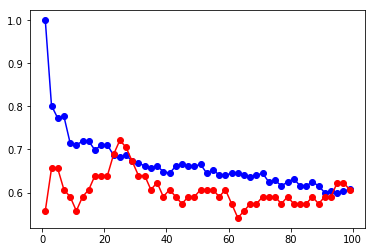

In [37]:
from sklearn.neighbors import KNeighborsClassifier

accuracies = []

K=list(range(1,100,2))
for i in K:
    KNNclass = KNeighborsClassifier(n_neighbors=i)
    KNNclass.fit(X_train,y_train)
    trainacc = np.mean(KNNclass.predict(X_train)==y_train['target'])
    testacc = np.mean(KNNclass.predict(X_test)==y_test['target'])
    accuracies.append([trainacc,testacc])
    

plt.plot(K,[i[0] for i in accuracies],"bo-")

plt.plot(K,[i[1] for i in accuracies],"ro-")

In [38]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [39]:
tensorflow_trainX = X_train.values
tensorflow_testX = X_test.values
tensorflow_trainy = y_train.values
tensorflow_testy = y_test.values

In [40]:
model = Sequential()
model.add(Dense(20, input_dim=13, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [41]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error','accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                280       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.fit(tensorflow_trainX, tensorflow_trainy, epochs=150, batch_size=100, validation_split = 0.2)

Train on 193 samples, validate on 49 samples
Epoch 1/150
193/193 [==============================] - 0s 2ms/step - loss: 0.4351 - mean_absolute_error: 0.4351 - accuracy: 0.5751 - val_loss: 0.4223 - val_mean_absolute_error: 0.4223 - val_accuracy: 0.5918
Epoch 2/150
193/193 [==============================] - 0s 35us/step - loss: 0.3789 - mean_absolute_error: 0.3789 - accuracy: 0.6218 - val_loss: 0.3602 - val_mean_absolute_error: 0.3602 - val_accuracy: 0.6735
Epoch 3/150
193/193 [==============================] - 0s 37us/step - loss: 0.3614 - mean_absolute_error: 0.3614 - accuracy: 0.6425 - val_loss: 0.3192 - val_mean_absolute_error: 0.3192 - val_accuracy: 0.6735
Epoch 4/150
193/193 [==============================] - 0s 35us/step - loss: 0.3443 - mean_absolute_error: 0.3443 - accuracy: 0.6632 - val_loss: 0.2923 - val_mean_absolute_error: 0.2923 - val_accuracy: 0.7347
Epoch 5/150
193/193 [==============================] - 0s 39us/step - loss: 0.3411 - mean_absolute_error: 0.3411 - accuracy:

In [43]:
model_1 = Sequential()
model_1.add(Dense(20, input_dim=13, activation='relu'))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))

In [44]:
model_1.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error','accuracy'])
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 20)                280       
_________________________________________________________________
dense_5 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_6 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_7 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_8 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_9 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                

In [45]:
model_1.fit(tensorflow_trainX, tensorflow_trainy, epochs=800, batch_size=150)

Epoch 1/800
242/242 [==============================] - 0s 1ms/step - loss: 0.5415 - mean_absolute_error: 0.5415 - accuracy: 0.4587
Epoch 2/800
242/242 [==============================] - 0s 28us/step - loss: 0.5413 - mean_absolute_error: 0.5413 - accuracy: 0.4587
Epoch 3/800
242/242 [==============================] - 0s 25us/step - loss: 0.5413 - mean_absolute_error: 0.5413 - accuracy: 0.4587
Epoch 4/800
242/242 [==============================] - 0s 24us/step - loss: 0.5413 - mean_absolute_error: 0.5413 - accuracy: 0.4587
Epoch 5/800
242/242 [==============================] - 0s 25us/step - loss: 0.5413 - mean_absolute_error: 0.5413 - accuracy: 0.4587
Epoch 6/800
242/242 [==============================] - 0s 22us/step - loss: 0.5413 - mean_absolute_error: 0.5413 - accuracy: 0.4587
Epoch 7/800
242/242 [==============================] - 0s 22us/step - loss: 0.5413 - mean_absolute_error: 0.5413 - accuracy: 0.4587
Epoch 8/800
242/242 [==============================] - 0s 24us/step - loss: 0

In [46]:
predict_ANN = model_1.predict_classes(tensorflow_testX)
confusion_matrix(predict_ANN,tensorflow_testy)

array([[18,  2],
       [ 9, 32]])

In [47]:
roc_auc_ANN = roc_auc_score(tensorflow_testy,predict_ANN)
print(roc_auc_ANN)

0.803921568627451


In [48]:
# As we can observe XGBoost is having higher accuracy, saving and deploying the model
import pickle

# Save the trained model as a pickle string. 
saved_model = pickle.dumps(xgb_params) 
  
# Load the pickled model 
from_pickle = pickle.loads(saved_model) 
  
# Use the loaded pickled model to make predictions 
from_pickle.predict(X_test) 

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0])